Pairs trading, we need to test the cointegration and stationary of data

Import packages

In [3]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style = 'whitegrid')

Stationary v.s. unstationary

/var/folders/5p/5d5cjs1n0sd8dhmpcjd35h0r0000gn/T/ipykernel_91603/4139385752.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  A = pd.Series(index = range(T))
/var/folders/5p/5d5cjs1n0sd8dhmpcjd35h0r0000gn/T/ipykernel_91603/4139385752.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  B = pd.Series(index = range(T))


Text(0.5, 1.0, 'Unstationary')

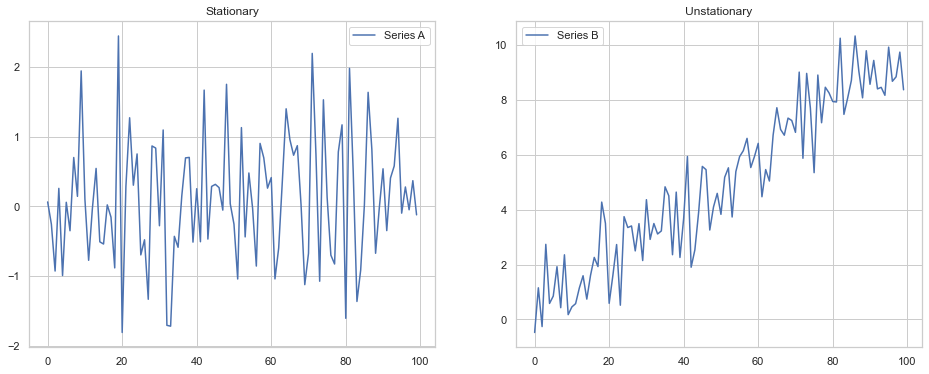

In [6]:
def generate_data(parameters):
    mu = parameters[0] ## the first item in parameters
    sigma = parameters[1] ## the second item in parameters
    return np.random.normal(mu, sigma)

parameters = (0, 1)
T = 100
A = pd.Series(index = range(T))
A.name = 'A'

for t in range(T):
    A[t] = generate_data(parameters) ## it will do T times

B = pd.Series(index = range(T))
B.name = 'B'

for t in range(T):
    parameters = (t*0.1, 1) ## the first item of parameter will increase by t, largest = 100 * 0.1 = 10
    B[t] = generate_data(parameters) ## it will do T times

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6)) ## plot two plots in one time
ax1.plot(A)
ax1.legend(['Series A'])
ax1.set_title('Stationary')
ax2.plot(B)
ax2.legend(['Series B'])
ax2.set_title('Unstationary')


Cointegration

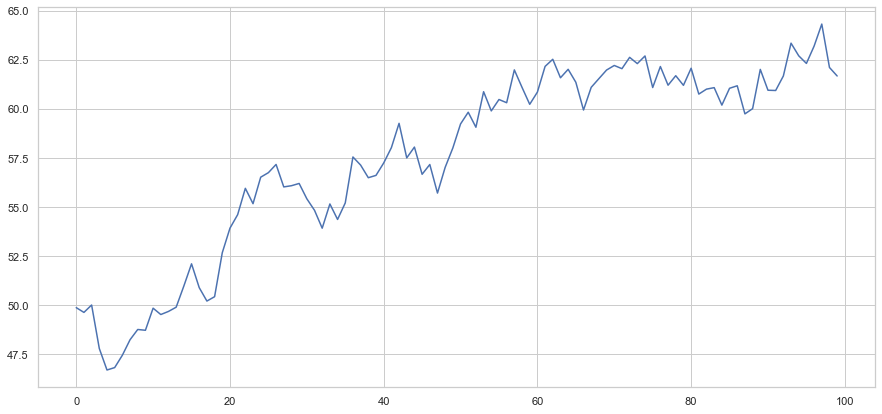

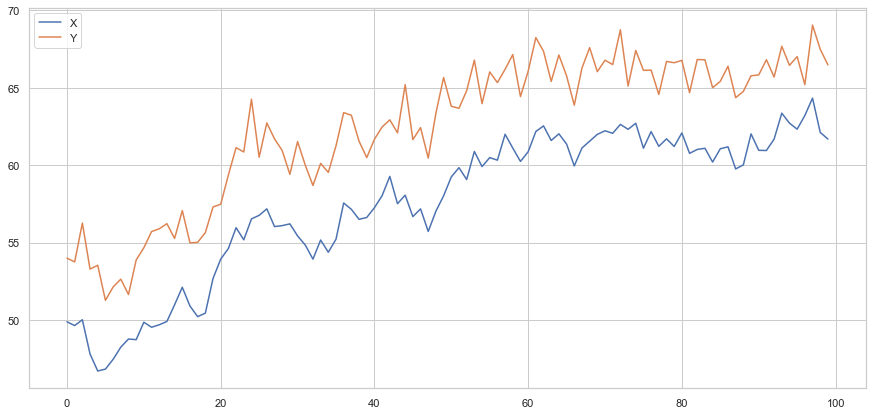

In [8]:
## Generate daily returns
Return = np.random.normal(0, 1, 100) ## define return as random normal sequence

## sum up and rise the daily return
X = pd.Series(np.cumsum(Return), name = 'X') + 50
X.plot(figsize = (15, 7))

noise = np.random.normal(0, 1, 100) ## define noise as random normal sequence
Y = X + noise + 5
Y.name = 'Y'

pd.concat([X, Y], axis=1).plot(figsize=(15, 7)) ## pd.concat is for merging datas

plt.show()


Plot the price spread (price difference between A and B)

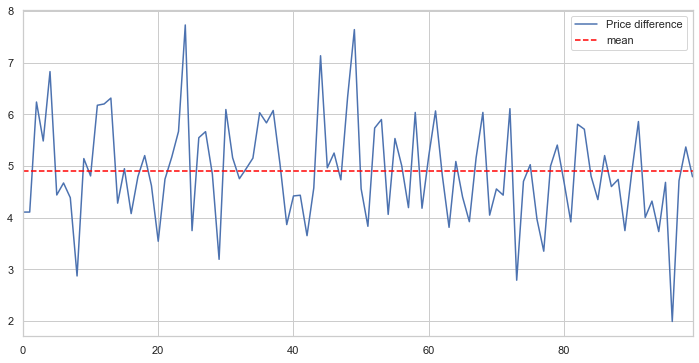

In [9]:
plt.figure(figsize = (12, 6))
(Y - X).plot()
plt.axhline((np.mean(Y - X)), color = 'red', linestyle = '--')
plt.xlabel = 'time'
plt.ylabel = 'price difference'
plt.xlim(0, 99)
plt.legend(['Price difference', 'mean'])